## easyaccess and DesCut Api example

In [1]:
import easyaccess as ea
import requests
import os
print ea.__version__

1.3.2-dev-01ae3bc


### Token

In [2]:
C=ea.api.DesCoaddCuts(root_url='http://descut.cosmology.illinois.edu:8999')

In [3]:
print(C.root_url)

http://descut.cosmology.illinois.edu:8999


In [4]:
C.get_token()

Token created, expiration time: 1 hours and 0 minutes


u'7475a1cc4b4ff21a84e99c836488885df9708ff0'

In [5]:
C.token.ttl()
C.token.active

Token is valid for 1 hours and 0 minutes


True

In [6]:
# RA,DEC example
ra=[29.47087800]
dec=[-41.54843300]

## Making the cuts

In [7]:
C.make_cuts(ra=ra, dec=dec, xsize=2, ysize=2)

Job e7f4b6a2-1fc9-452e-bcc9-dda300dd9b5e submitted.


In [8]:
# Check its status
C.job.status

u'PENDING'

In [9]:
# Delete the job (remove from server as well)
C.job.delete()

Job e7f4b6a2-1fc9-452e-bcc9-dda300dd9b5e was deleted from the DB


### Can submit and wait until is ready

In [10]:
C.make_cuts(ra=ra, dec=dec, xsize=2, ysize=2, wait=True)

Job 285751e2-7195-46ac-bba7-db789846f536 submitted.


In [11]:
# Check its status
C.job.status

u'SUCCESS'

### Job returns list of link 

In [12]:
C.job.links

[u'http://descut.cosmology.illinois.edu:8999/static/uploads/mcarras2/results/285751e2-7195-46ac-bba7-db789846f536/DESJ015753.0-413254.4_Y.fits',
 u'http://descut.cosmology.illinois.edu:8999/static/uploads/mcarras2/results/285751e2-7195-46ac-bba7-db789846f536/DESJ015753.0-413254.4_i.fits',
 u'http://descut.cosmology.illinois.edu:8999/static/uploads/mcarras2/results/285751e2-7195-46ac-bba7-db789846f536/DESJ015753.0-413254.4_g.fits',
 u'http://descut.cosmology.illinois.edu:8999/static/uploads/mcarras2/results/285751e2-7195-46ac-bba7-db789846f536/DESJ015753.0-413254.4_r.fits',
 u'http://descut.cosmology.illinois.edu:8999/static/uploads/mcarras2/results/285751e2-7195-46ac-bba7-db789846f536/DESJ015753.0-413254.4_z.fits',
 u'http://descut.cosmology.illinois.edu:8999/static/uploads/mcarras2/results/285751e2-7195-46ac-bba7-db789846f536/DESJ015753.0-413254.4.stifflog',
 u'http://descut.cosmology.illinois.edu:8999/static/uploads/mcarras2/results/285751e2-7195-46ac-bba7-db789846f536/DESJ015753.0-4

### Can copy files locally

In [13]:
C.get_files(folder='demo_example')

6 files copied to local server


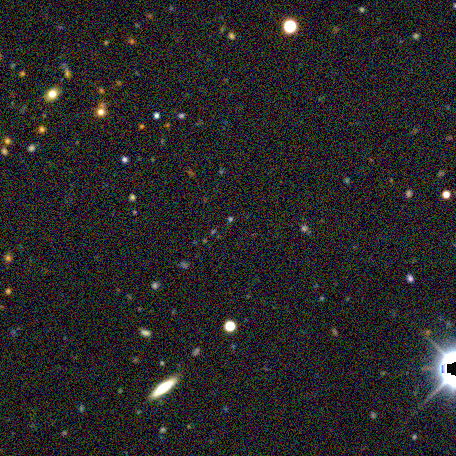

In [14]:
C.show_pngs()

### Can use csv files as well

In [15]:
C.make_cuts(xsize=2,ysize=2,csvfile='example.csv', wait=True)

Job bac2651b-f3c3-4bb1-881a-926083c19740 submitted.


In [16]:
C.get_files(folder='example2')

12 files copied to local server


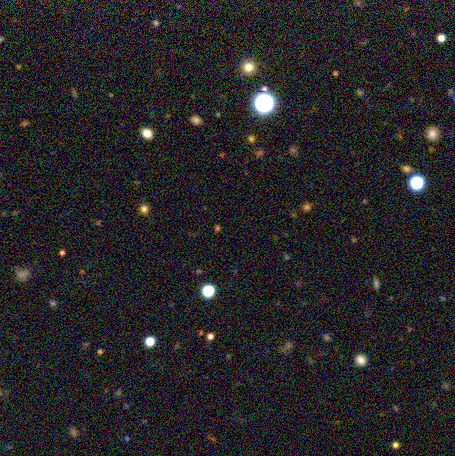

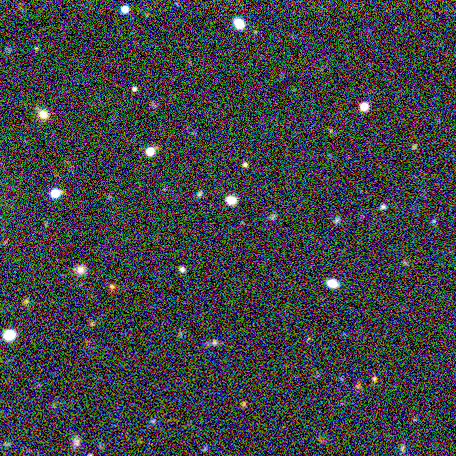

In [17]:
C.show_pngs()

### Can get information about all my jobs

In [18]:
my_jobs=ea.api.MyJobs(root_url='http://descut.cosmology.illinois.edu:8999')

In [19]:
my_jobs.list

[Job(jobid=bac2651b-f3c3-4bb1-881a-926083c19740, user=mcarras2, token=dd2a149eb02e24d4532dd9a7297b157e583e67fa, url=http://descut.cosmology.illinois.edu:8999),
 Job(jobid=285751e2-7195-46ac-bba7-db789846f536, user=mcarras2, token=dd2a149eb02e24d4532dd9a7297b157e583e67fa, url=http://descut.cosmology.illinois.edu:8999),
 Job(jobid=bc7a8e57-7425-4783-83f4-447516ff2fec, user=mcarras2, token=dd2a149eb02e24d4532dd9a7297b157e583e67fa, url=http://descut.cosmology.illinois.edu:8999),
 Job(jobid=54fa1765-6394-4fe5-af42-343e26c9fe33, user=mcarras2, token=dd2a149eb02e24d4532dd9a7297b157e583e67fa, url=http://descut.cosmology.illinois.edu:8999),
 Job(jobid=a63f764a-fc43-4db9-b64c-8ddc8d18517b, user=mcarras2, token=dd2a149eb02e24d4532dd9a7297b157e583e67fa, url=http://descut.cosmology.illinois.edu:8999),
 Job(jobid=c014341a-dc09-4146-adfc-b26683ce9a9f, user=mcarras2, token=dd2a149eb02e24d4532dd9a7297b157e583e67fa, url=http://descut.cosmology.illinois.edu:8999),
 Job(jobid=04d5c1ca-8f39-47bb-be66-5f572

In [20]:
print my_jobs[3]

54fa1765-6394-4fe5-af42-343e26c9fe33


In [21]:
del my_jobs[1]

## Integrated JS9 (DS9 for the web)

We have been working on trying to make the integration of Js9 and Jupyter notebook much easier
There is an on-going repo [Here](https://github.com/mgckind/jjs9).

There are 2 version, for now we will use the Local Version which load js9 by default when the notebook is open

In [22]:
import jjs9

In [23]:
J=jjs9.Js9Local()

#### To create a Display (and assign an id)

In [24]:
J.NewDiv()

Display id = 484779f56648499198d66b766883436aJS9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### to Delete a Display

In [25]:
J.DelDiv()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
J.NewDiv()

Display id = d4fa98b308754e74a5584b2a7c611584JS9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### To Load Fits files, change color maps, 

In [27]:
J.Load('demo_example/DESJ015753.0-413254.4_i.fits')

<IPython.core.display.Javascript object>

In [28]:
J.SetColorMap('red')

<IPython.core.display.Javascript object>

In [29]:
J.SetColorMap('grey')

<IPython.core.display.Javascript object>

In [30]:
J.header['NAXIS1']

456

## Accessing the DB for objects

In [31]:
con=ea.connect()

Connecting to DB ** dessci ** ...


### get corners

In [32]:
ra1,dec0=J.wcs_pix2world(0,0,1)
ra1=ra1.tolist()
dec0=dec0.tolist()
ra0,dec1=J.wcs_pix2world(J.header['NAXIS1'],J.header['NAXIS1'],1)
ra0=ra0.tolist()
dec1=dec1.tolist()
corners = {'RA0':ra0, 'DEC0':dec0,'RA1':ra1, 'DEC1':dec1}

In [33]:
q='select MAG_AUTO_I,ra,dec from Y1A1_COADD_OBJECTS where RA between {RA0} and {RA1} and DEC between {DEC0} and {DEC1}'
q=q.format(**corners)
q

'select MAG_AUTO_I,ra,dec from Y1A1_COADD_OBJECTS where RA between 29.4486235538 and 29.4931365606 and DEC between -41.565073131 and -41.5317598011'

In [34]:
df = con.query_to_pandas(q) # From easyaccess directly into pandas

In [35]:
df.tail(3)

MAG_AUTO_I         RA        DEC
96     18.7771  29.477150 -41.560048
97     23.0916  29.472271 -41.548650
98     22.7235  29.476684 -41.540883

### Display Regions

In [36]:
x,y=J.wcs_world2pix(df.RA.values,df.DEC.values,1)
radius=[10]*len(x)
J.AddRegions(x=x,y=y,radius=radius)

<IPython.core.display.Javascript object>

## What about Single Epoch cutouts?

Note that the api is slightly different until both services are merged in one place

In [37]:
S=ea.api.DesSingleCuts(root_url='http://descut.cosmology.illinois.edu:8000')

In [38]:
# RA,DEC example
ra=[29.47087800]
dec=[-41.54843300]

In [39]:
S.get_token()

Token created, expiration is 24 hours


u'a30ec823b9c30ee1f460243d9292af82eb17535d'

In [40]:
S.make_cuts(ra=ra, dec=dec)

Job 66272270-c633-49e1-bd15-62dd2119476b for mcarras2 has been submitted


In [43]:
S.status

u'Job completed.'

In [44]:
S.links=S.job.json()['links']

### some temporary workaround to copy the files

In [45]:
import os
all_files=[]
for link in S.links:
    link = link.replace('desdev3.cosmology.illinois.edu','descut.cosmology.illinois.edu:8000')
    if link.endswith('png') or link.endswith('fits'):
        temp_file = os.path.join('demo_single', os.path.basename(link))
        all_files.append(temp_file)
        req = requests.get(link, stream=True)
        if req.status_code == 200:
            with open(temp_file, 'wb') as temp_file:
                for chunk in req:
                    temp_file.write(chunk)

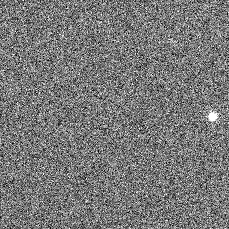

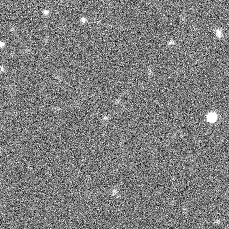

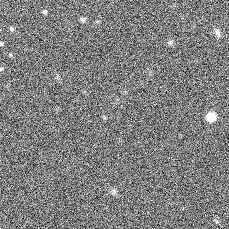

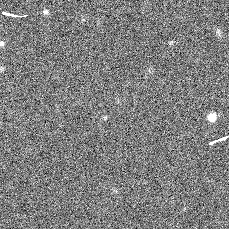

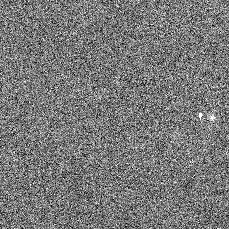

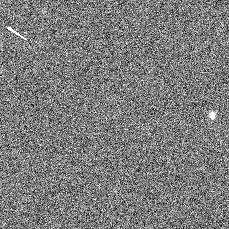

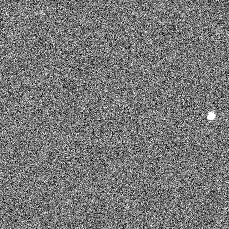

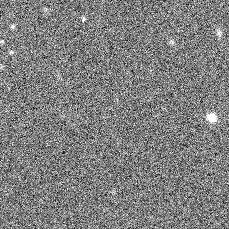

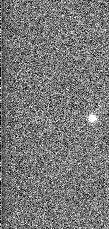

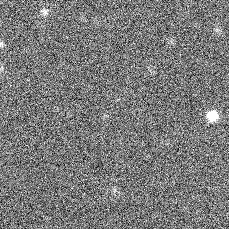

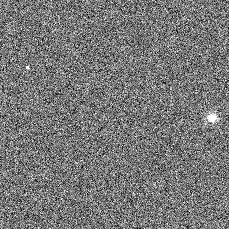

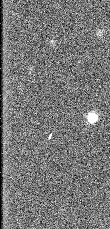

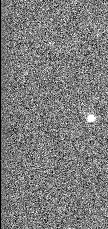

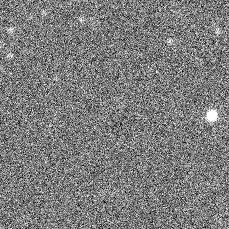

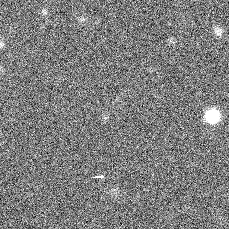

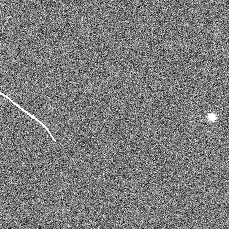

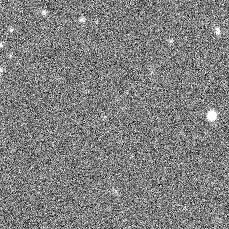

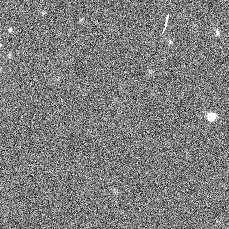

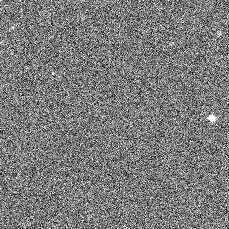

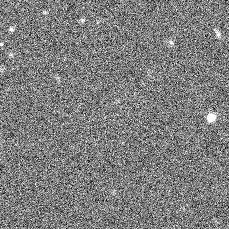

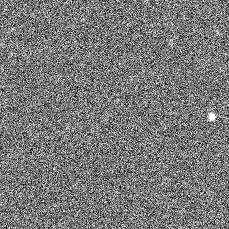

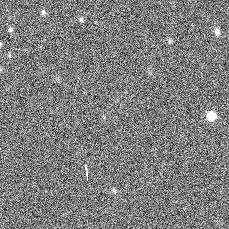

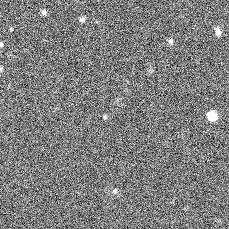

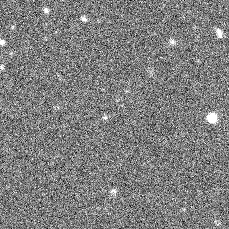

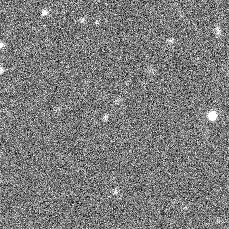

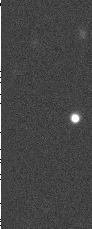

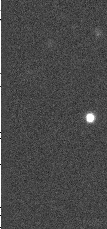

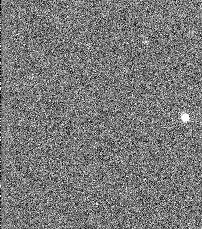

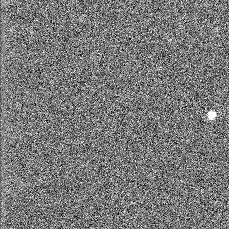

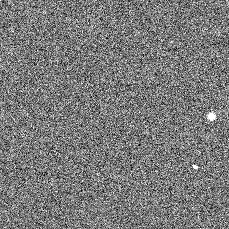

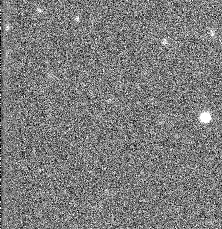

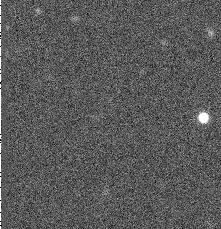

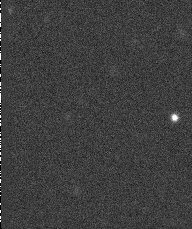

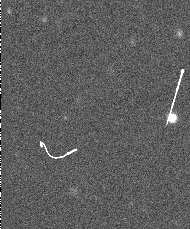

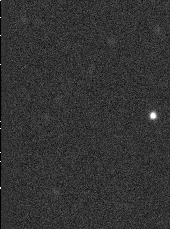

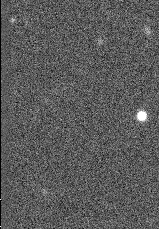

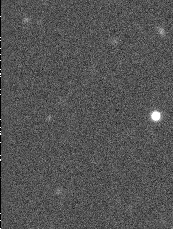

In [46]:
from IPython.display import Image, display
for file_png in all_files:
    if file_png.endswith('.png'):
        temp_display = Image(filename=file_png)
        display(temp_display)

In [47]:
J2=jjs9.Js9Local()

In [48]:
J2.NewDiv()

Display id = 1e3907c0e938480b9c85e3b1d69a73ffJS9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
import glob
list_g_files=glob.glob('demo_single/*_g_*.fits')

In [50]:
for g_file in list_g_files:
    J2.Load(g_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
J3=jjs9.Js9Local()

In [52]:
J3.NewDiv()
J3.Load('demo_single/DESJ015753.0-413254.4_i_20131210.fits')

Display id = d2cab9347c864f66bec01c18f58453a6JS9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
J3.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  229 / length of data axis 1                          
NAXIS2  =                  229 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
EXTNAME = 'SCI     '                                                            
PROCTYPE= 'RAW     '           / Data processing level                          
PRODTYPE= 'image   '           / Data product type                              
PIXSCAL1=                 0.27 / [arcsec/pixel] Pixel scale, axis 1             
PIXSCAL2=                 0.

In [54]:
ra1,dec0=J3.wcs_pix2world(0,0,1)
ra1=ra1.tolist()
dec0=dec0.tolist()
ra0,dec1=J3.wcs_pix2world(J3.header['NAXIS1'],J3.header['NAXIS1'],1)
ra0=ra0.tolist()
dec1=dec1.tolist()
corners = {'RA0':min(ra0,ra1), 'DEC0':min(dec0,dec1),'RA1':max(ra0,ra1), 'DEC1':max(dec0,dec1), 'EXPNUM' : J3.header['EXPNUM'], 'BAND' : J3.header['BAND']}

In [55]:
con2=ea.connect('desoper')

Connecting to DB ** desoper ** ...


In [56]:
q="select ra,dec from prod.SE_OBJECT_SUMMARY where RA between {RA0} and {RA1} and DEC between {DEC0} and {DEC1} and EXPNUM={EXPNUM} and BAND='{BAND}'"

In [57]:
q=q.format(**corners)
q

"select ra,dec from prod.SE_OBJECT_SUMMARY where RA between 29.4596906281 and 29.481771491 and DEC between -41.5567423356 and -41.5398873772 and EXPNUM=262570 and BAND='i'"

### ... and on and on

In [58]:
df=con2.query_to_pandas(q)

In [59]:
df.tail(3)

RA        DEC
7  29.479208 -41.540968
8  29.480141 -41.546123
9  29.480874 -41.543346

In [60]:
x,y=J3.wcs_world2pix(df.RA.values,df.DEC.values,1)
radius=[10]*len(x)
J3.AddRegions(x=x,y=y,radius=radius)

<IPython.core.display.Javascript object>